# R and Python 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
try:
    import rpy2
except ImportError:
    print('pip install rpy2')

pip install rpy2


In [7]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [8]:
rpy2.robjects.numpy2ri.activate()

In [12]:
r_code = """
greetings <- function(name){
    return(paste("Hello, ", name))
}
"""

In [13]:
ro.r(r_code)

R object with classes: ('function',) mapped to:

In [14]:
greetings_py = ro.globalenv["greetings"]

In [15]:
res = greetings_py("Matteo BENCI")
res[0]

'Hello,  Matteo BENCI'

In [16]:
type(res)

rpy2.robjects.vectors.StrVector

In [17]:
print(greetings_py.r_repr())

function (name) 
{
    return(paste("Hello, ", name))
}


In [18]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [19]:
var_from_python

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [20]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [21]:
ro.globalenv["var_to_r"] = var_from_python

In [22]:
ro.r("var_to_r")

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [23]:
ro.r("sum(var_to_r)")

118.000000


In [24]:
ro.r("mean(var_to_r)")

2.950000


In [25]:
ro.r("sd(var_to_r)")

1.169045


In [26]:
np.sum(var_from_python)

118.00000000000007

In [27]:
np.mean(var_from_python)

2.950000000000002

In [28]:
ro.r("summary(var_to_r)")

1.000000,1.975000,2.950000,2.950000,3.925000,4.900000


In [29]:
ro.r("hist(var_to_r, breaks = 4)")

breaks,[RTYPES.INTSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


# Working together with R and Python

In [35]:
data = pd.read_csv("data/time_series.txt", 
                   sep = "\s*", skiprows = 1, parse_dates = [[0,1]],
                   names = ["date", "time", "wind_speed"],
                   index_col = 0)

/Users/valerio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/Users/valerio/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/valerio/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [36]:
data.head(5)

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [37]:
data.shape

(275352, 1)

In [38]:
max_ws = data.wind_speed.groupby(pd.TimeGrouper(freq="A")).max()

/Users/valerio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [39]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

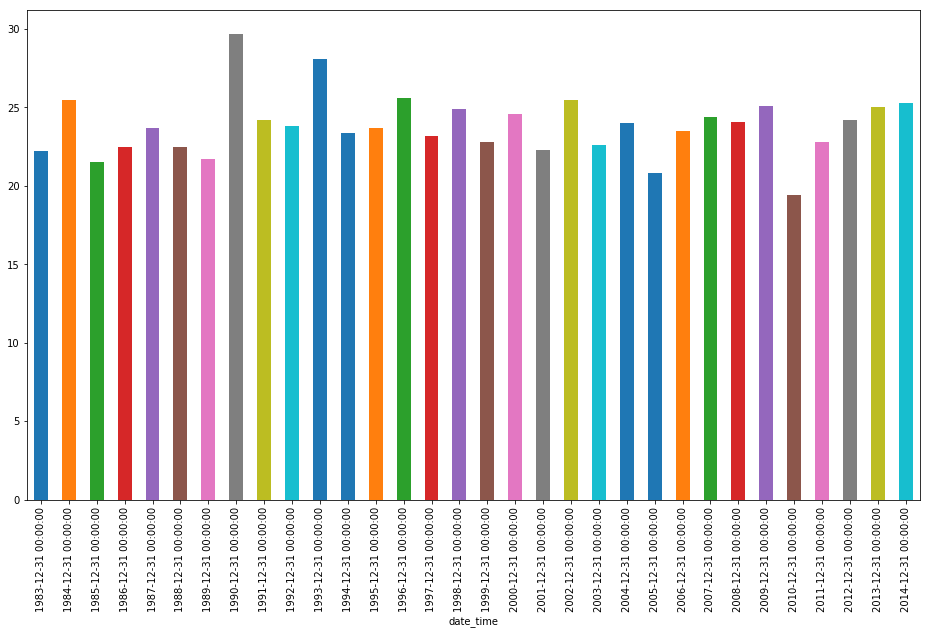

In [40]:
max_ws.plot(kind="bar", figsize=(16,9))

# R IPython (Jupyter) Magic

In [56]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [53]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with
    semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
    Nothing is returned to python by default in cell mo

In [54]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [55]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0.88 -0.24 -2.28  1.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.0800     2.3000   0.035    0.975
X             1.0400     0.4822   2.157    0.164

Residual standard error: 2.088 on 2 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 
F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638

